In [12]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
def draw_adj(adj_matrix,lag_bin, lag_day,stock_info):
    # 可视化有向图
    G = nx.DiGraph(adj_matrix.T)
    station_coords = gen_station_coords_leftup(lag_bin, lag_day,stock_info)
    res = {}
    for i in range(len(station_coords)):
        res[i] = [station_coords[i][0], abs(station_coords[i][1])]

    res = dict(sorted(res.items(), key=lambda x: x[1][1], reverse=True))

    pos = {}
    for i, key in enumerate(res.keys()):
        pos[i] = res[key]

    plt.figure(figsize=(4, 4))
    nx.draw_networkx(G,pos=pos,  with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)
    plt.title("Directed Graph")
    plt.axis('off')
    plt.show()


In [14]:
adj=np.load('/volume1/home/rzhu/gcn/data/volume/0308/000046_XSHE_3_3_graph_input.npy')

In [15]:
a=np.load('/volume1/home/rzhu/gcn/data/volume/0308/000046_XSHE_3_3_graph_coords.npy')

In [16]:
def draw_adj(adj_matrix,station_coords,lag_bin, lag_day,):
    # 可视化有向图
    G = nx.DiGraph(adj_matrix.T)
    res = {}
    for i in range(len(station_coords)):
        res[i] = [station_coords[i][0], abs(station_coords[i][1])]

    res = dict(sorted(res.items(), key=lambda x: x[1][1], reverse=True))

    pos = {}
    for i, key in enumerate(res.keys()):
        pos[i] = res[key]

    plt.figure(figsize=(4, 4))
    nx.draw_networkx(G,pos=pos,  with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)
    plt.title("Directed Graph")
    plt.axis('off')
    plt.show()


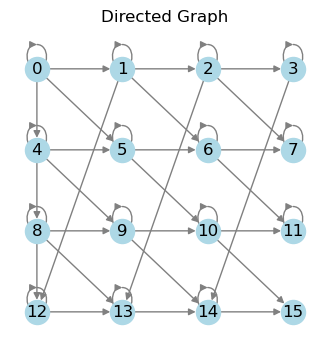

In [17]:
draw_adj(adj,a,3,3)

In [18]:
adj

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.70710678, 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.5       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.5       , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.70710678, 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 

In [19]:
np.set_printoptions(threshold=np.inf)

In [20]:
# 获取非零元素的坐标，即边的起始节点和目标节点
edges = np.transpose(np.nonzero(adj))
# 转换为边索引的列表形式
edge_index = edges.tolist()
edge_index

[[0, 0],
 [1, 0],
 [1, 1],
 [2, 1],
 [2, 2],
 [3, 2],
 [3, 3],
 [4, 0],
 [4, 4],
 [5, 0],
 [5, 4],
 [5, 5],
 [6, 1],
 [6, 5],
 [6, 6],
 [7, 2],
 [7, 6],
 [7, 7],
 [8, 4],
 [8, 8],
 [9, 4],
 [9, 8],
 [9, 9],
 [10, 5],
 [10, 9],
 [10, 10],
 [11, 6],
 [11, 10],
 [11, 11],
 [12, 1],
 [12, 8],
 [12, 12],
 [13, 2],
 [13, 8],
 [13, 12],
 [13, 13],
 [14, 3],
 [14, 9],
 [14, 13],
 [14, 14],
 [15, 10],
 [15, 14]]

In [21]:
edge_diff = [[edge[0] - edge[1]] for edge in edge_index]

In [22]:
edge_diff

[[0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [4],
 [0],
 [5],
 [1],
 [0],
 [5],
 [1],
 [0],
 [5],
 [1],
 [0],
 [4],
 [0],
 [5],
 [1],
 [0],
 [5],
 [1],
 [0],
 [5],
 [1],
 [0],
 [11],
 [4],
 [0],
 [11],
 [5],
 [1],
 [0],
 [11],
 [5],
 [1],
 [0],
 [5],
 [1]]

In [23]:
edge_diff = [edge[0] - edge[1] for edge in edge_index]

In [35]:
# 计算不同侧的差值
diff_values = list(set([edge[0] - edge[1] for edge in edge_index]))

# 分配唯一标签给每个不同的差值
label_dict = {val: i for i, val in enumerate(diff_values)}

# 将差值转换为相应的 one-hot 编码
one_hot_diff = []
for edge in edge_index:
    diff = edge[0] - edge[1]
    one_hot = [0] * len(diff_values)
    one_hot[label_dict[diff]] = 1
    one_hot_diff.append(one_hot)

In [36]:
one_hot_diff

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0]]

In [26]:
def adjacency_matrix_to_edge_index(adj_matrix):
    edge_index = []
    num_nodes = adj_matrix.shape[0]
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i, j] != 0:  # 非零元素表示有边连接
                edge_index.append([i, j])
    return torch.tensor(edge_index).t().contiguous()


In [54]:
ax=adjacency_matrix_to_edge_index(adj)
ax

tensor([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,  7,
          8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13,
         14, 14, 14, 14, 15, 15],
        [ 0,  0,  1,  1,  2,  2,  3,  0,  4,  0,  4,  5,  1,  5,  6,  2,  6,  7,
          4,  8,  4,  8,  9,  5,  9, 10,  6, 10, 11,  1,  8, 12,  2,  8, 12, 13,
          3,  9, 13, 14, 10, 14]])

In [58]:
def compute_edge_one_hot(edge_index):
    # 计算不同侧的差值
    diff_values = list(set([edge[0] - edge[1] for edge in edge_index]))
    # 分配唯一标签给每个不同的差值
    label_dict = {val: i for i, val in enumerate(diff_values)}

    # 将差值转换为相应的 one-hot 编码
    one_hot_diff = []
    for edge in edge_index:
        diff = edge_index[0] - edge_index[1]
        print(diff)
        one_hot = [0] * len(diff_values)
        one_hot[label_dict[diff]] = 1
        one_hot_diff.append(one_hot)

    return one_hot_diff


In [59]:
compute_edge_one_hot(ax)

tensor([ 0,  1,  0,  1,  0,  1,  0,  4,  0,  5,  1,  0,  5,  1,  0,  5,  1,  0,
         4,  0,  5,  1,  0,  5,  1,  0,  5,  1,  0, 11,  4,  0, 11,  5,  1,  0,
        11,  5,  1,  0,  5,  1])


KeyError: tensor([ 0,  1,  0,  1,  0,  1,  0,  4,  0,  5,  1,  0,  5,  1,  0,  5,  1,  0,
         4,  0,  5,  1,  0,  5,  1,  0,  5,  1,  0, 11,  4,  0, 11,  5,  1,  0,
        11,  5,  1,  0,  5,  1])

In [60]:
import torch
import torch.nn.functional as F

# 你的 edge_index 张量
edge_index = torch.tensor([[ 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 9 , 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15], 
                            [ 0, 0, 1 , 1, 2, 2, 3, 0, 4, 0, 4, 5, 1, 5, 6, 2, 6, 7, 4, 8, 4, 8, 9, 5, 9, 10, 6, 10 , 11, 1, 8, 12, 2, 8, 12, 13, 3, 9, 13, 14, 10, 14]])

# 计算每对边的差值
diff = edge_index[0] - edge_index[1]

# 使用 one-hot 编码
num_unique_vals = len(torch.unique(diff))
one_hot = F.one_hot(diff, num_classes=num_unique_vals)

# 打印结果
print("差值:", diff)
print("One-hot 编码:", one_hot)


RuntimeError: Class values must be smaller than num_classes.

In [61]:
import torch
import torch.nn.functional as F

# 你的 edge_index 张量
edge_index = torch.tensor([[ 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 9 , 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15], 
                            [ 0, 0, 1 , 1, 2, 2, 3, 0, 4, 0, 4, 5, 1, 5, 6, 2, 6, 7, 4, 8, 4, 8, 9, 5, 9, 10, 6, 10 , 11, 1, 8, 12, 2, 8, 12, 13, 3, 9, 13, 14, 10, 14]])

# 计算每对边的差值
diff = edge_index[0] - edge_index[1]

# 确保差值在非负整数范围内
min_val = torch.min(diff)
max_val = torch.max(diff)
diff = diff - min_val

# 使用 one-hot 编码
num_unique_vals = len(torch.unique(diff))
one_hot = F.one_hot(diff, num_classes=num_unique_vals)

# 打印结果
print("差值:", diff)
print("One-hot 编码:", one_hot)


RuntimeError: Class values must be smaller than num_classes.

In [62]:
import torch

# 你的 edge_index 张量
edge_index = torch.tensor([[ 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 9 , 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15], 
                            [ 0, 0, 1 , 1, 2, 2, 3, 0, 4, 0, 4, 5, 1, 5, 6, 2, 6, 7, 4, 8, 4, 8, 9, 5, 9, 10, 6, 10 , 11, 1, 8, 12, 2, 8, 12, 13, 3, 9, 13, 14, 10, 14]])

# 计算每对边的差值
diff = edge_index[0] - edge_index[1]

# 将差值映射到五个类别中的一个
num_classes = 5
mapping = torch.linspace(diff.min(), diff.max(), num_classes)
mapped_diff = torch.bucketize(diff, mapping)

# 打印结果
print("差值:", diff)
print("映射后的差值:", mapped_diff)


差值: tensor([ 0,  1,  0,  1,  0,  1,  0,  4,  0,  5,  1,  0,  5,  1,  0,  5,  1,  0,
         4,  0,  5,  1,  0,  5,  1,  0,  5,  1,  0, 11,  4,  0, 11,  5,  1,  0,
        11,  5,  1,  0,  5,  1])
映射后的差值: tensor([0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2,
        1, 0, 2, 1, 0, 4, 2, 0, 4, 2, 1, 0, 4, 2, 1, 0, 2, 1])


In [63]:
0, 6, 10 , 11, 1, 8, 12, 2, 8, 12, 13, 3, 9, 13, 14, 10, 14]])

# 计算每对边的差值
diff = edge_index[0] - edge_index[1]

# 获取差值的唯一值
unique_diff = torch.unique(diff)

# 创建一个空的 one-hot 编码向量
num_unique_diff = len(unique_diff)
one_hot_encoding = torch.zeros(num_unique_diff, num_unique_diff)

# 对每个唯一的差值进行 one-hot 编码
for i, val in enumerate(unique_diff):
    one_hot_encoding[i, i] = 1

# 创建一个字典，用于将差值映射到 one-hot 编码
mapping = {val.item(): one_hot_encoding[i] for i, val in enumerate(unique_diff)}

# 将差值映射到 one-hot 编码
mapped_diff = torch.stack([mapping[val.item()] for val in diff])

# 打印结果
print("差值:", diff)
print("映射后的差值:", mapped_diff)


差值: tensor([ 0,  1,  0,  1,  0,  1,  0,  4,  0,  5,  1,  0,  5,  1,  0,  5,  1,  0,
         4,  0,  5,  1,  0,  5,  1,  0,  5,  1,  0, 11,  4,  0, 11,  5,  1,  0,
        11,  5,  1,  0,  5,  1])
映射后的差值: tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0.

In [66]:
unique_diff = torch.unique(edge_index[0] - edge_index[1])

# 创建一个字典，用于将差值映射到 one-hot 编码
mapping = {val.item(): torch.eye(len(unique_diff))[i] for i, val in enumerate(unique_diff)}

# 将差值映射到 one-hot 编码
mapped_diff = torch.stack([mapping[val.item()] for val in diff])

print("映射后的差值:", mapped_diff)


映射后的差值: tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
  

In [67]:
e = torch.randn(42, 5)

In [68]:
e

tensor([[ 1.0402e+00,  5.4969e-01, -2.3637e+00, -7.3571e-02,  2.1815e-01],
        [-2.5482e-01, -5.0433e-01, -2.7354e+00, -2.1235e+00,  3.2753e-01],
        [ 7.1252e-01,  6.4039e-01, -1.4330e+00,  6.7873e-01, -5.6390e-01],
        [ 1.0519e+00,  5.0872e-01,  1.1309e+00, -7.1784e-01, -1.5061e+00],
        [ 1.4860e+00,  5.7548e-01,  1.4527e+00, -6.0653e-01, -1.3229e-01],
        [ 3.3468e-01,  1.5451e+00, -1.7056e+00, -6.4720e-01,  1.0431e+00],
        [ 5.7325e-01, -5.2594e-02, -1.7851e-01,  1.9007e+00,  1.0984e-01],
        [ 2.4091e-01, -8.3502e-01, -3.0136e-02, -1.2440e+00, -1.6196e+00],
        [ 9.7388e-02,  1.8168e+00,  2.0757e+00,  1.6941e-01, -1.1390e+00],
        [-9.9980e-02, -8.8972e-01,  1.0523e+00,  5.7777e-01, -3.7318e-01],
        [ 8.3200e-01, -1.1957e-01, -1.4842e-01, -4.9129e-01, -3.3094e-01],
        [ 6.3433e-01, -1.1297e+00, -3.0354e-02, -1.8008e-01, -2.5387e-01],
        [-1.7154e+00, -1.4131e+00, -1.0682e+00,  9.8996e-01, -1.7217e+00],
        [ 1.8081e+00,  1.